In [20]:
# importing modules
import os
import numpy as np
import mne

In [21]:
# loading data
raw = mne.io.read_raw_brainvision("58044/Group5/Group5_own.vhdr", eog=('EOG1', 'EOG2'))
raw.load_data()

raw

Extracting parameters from 58044/Group5/Group5_own.vhdr...
Setting channel info structure...
Reading 0 ... 599719  =      0.000 ...   599.719 secs...


<RawBrainVision | Group5_own.eeg, 32 x 599720 (599.7 s), ~146.5 MB, data loaded>

In [22]:
# specyfing the channel location using the montage related functions
montage = mne.channels.make_standard_montage('standard_1020')

raw.set_montage(montage, verbose=False)

<RawBrainVision | Group5_own.eeg, 32 x 599720 (599.7 s), ~146.5 MB, data loaded>

In [23]:
#redefining reference to a common average
raw.set_eeg_reference('average', projection=False, verbose=False)

<RawBrainVision | Group5_own.eeg, 32 x 599720 (599.7 s), ~146.5 MB, data loaded>

Opening raw-browser...


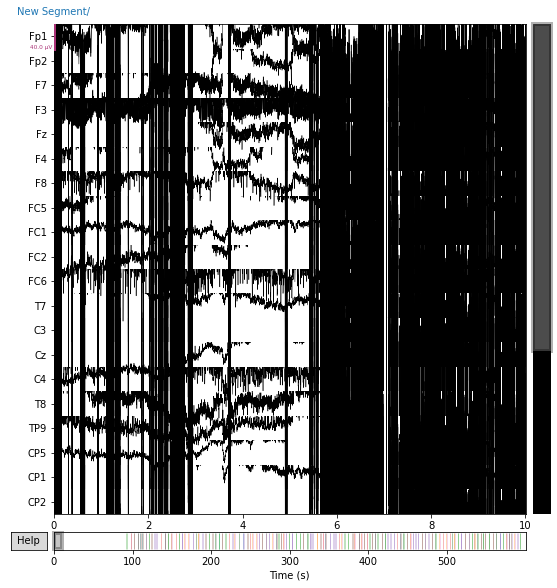

In [24]:
# default plot function
raw.pick_types(meg=False, eeg=True, stim=True)
raw.plot();

Opening raw-browser...


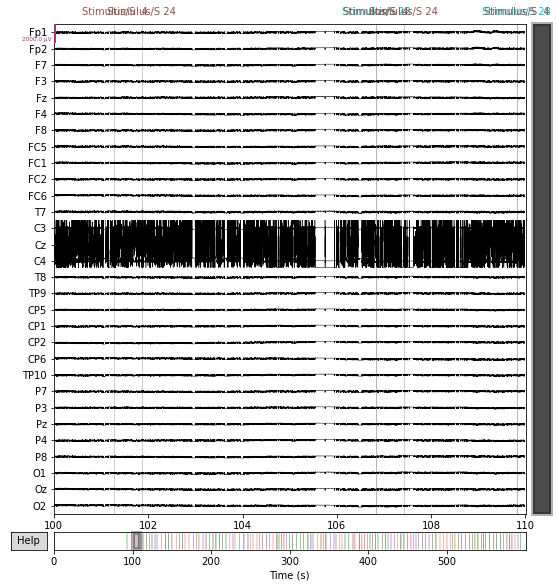

In [25]:
# choosing all channels and scaling (set to auto for now) 
raw.pick_types(meg=False, eeg=True, stim=True)
raw.plot(n_channels = 32, scalings = dict(eeg=100e-5, eog=150e-6), start=100, duration=10);

In [26]:
# f*ck central zentrum (Defining bad channels) 
raw.info['bads'] = ['Cz']
raw.pick_types(meg=False, eeg=True, stim=True, exclude='bads')

<RawBrainVision | Group5_own.eeg, 29 x 599720 (599.7 s), ~132.7 MB, data loaded>

Opening raw-browser...


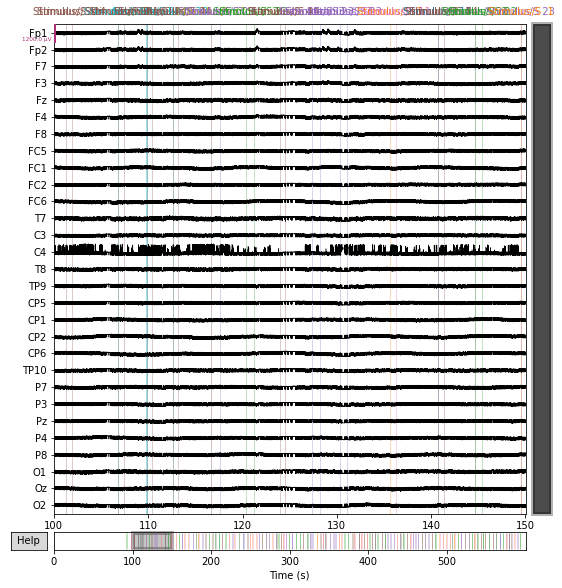

In [30]:
raw.plot(n_channels = 32, scalings = dict(eeg=600e-6, eog=150e-6), start = 100, duration = 50);

In [31]:
# Also f*ck C4
raw.info['bads'] = ['C4']
raw.pick_types(meg=False, eeg=True, stim=True, exclude='bads')

<RawBrainVision | Group5_own.eeg, 28 x 599720 (599.7 s), ~128.2 MB, data loaded>

Opening raw-browser...


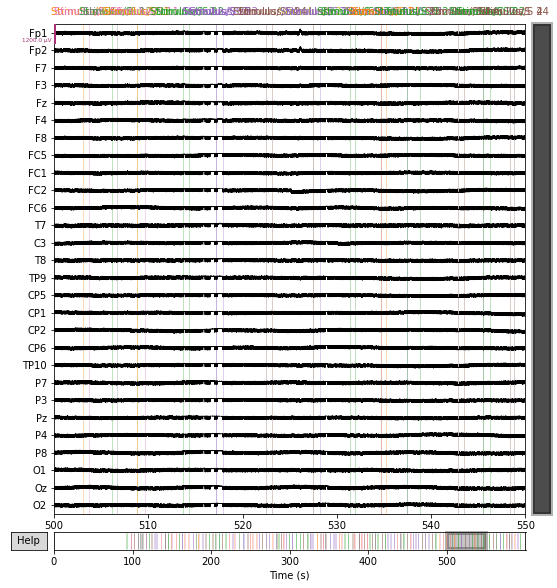

In [33]:
raw.plot(n_channels = 32, scalings = dict(eeg=600e-6, eog=150e-6), start = 100, duration = 50);

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 33001 samples (33.001 sec)

Opening raw-browser...


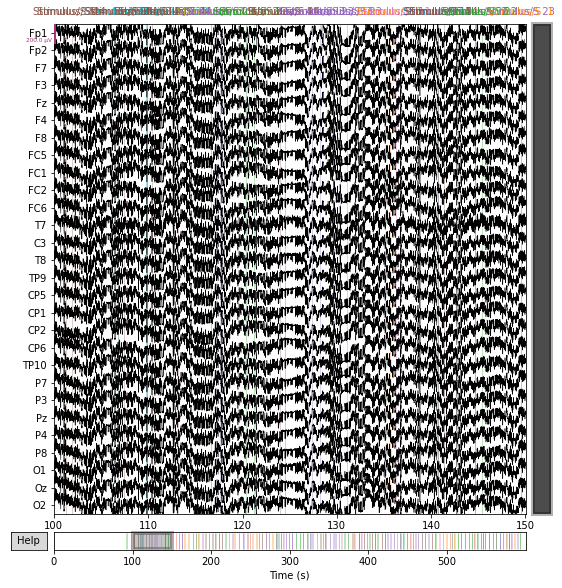

In [36]:
raw = raw.filter(0.1, 40) #high-pass filtering at 0.1 Hz, and low-pass filtering at 40 hZ. 

raw.plot(n_channels = 32, scalings = dict(eeg=100e-6, eog=150e-6), start=100, duration = 50);

In [54]:
# extracting the triggers
info = mne.events_from_annotations(raw)

# isolating all events 
events = info[0]

# uniques?
event_id_np = np.unique(events[:,2])
event_id_np

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  4', 'Stimulus/S 11', 'Stimulus/S 12', 'Stimulus/S 13', 'Stimulus/S 14', 'Stimulus/S 15', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 24', 'Stimulus/S 25', 'Stimulus/S 26', 'Stimulus/S 27', 'Stimulus/S 28']


array([    1,     2,     3,     4,    11,    12,    13,    14,    15,
          21,    22,    23,    24,    25,    26,    27,    28, 99999])

In [63]:
# setting up event dictionary 
event_id = {'RealWord': 1,
            'CenterShuffled': 2, 
            'FullyShuffled': 3, 
            'Foreign': 4,
            'YesReal': 11,
            'YesCenter': 12,
            'YesFully': 13,
            'YesForeign': 14, 
            'NoReal': 21, 
            'NoCenter': 22,
            'NoFully': 23,  
            'NoForeign': 24,
            '15': 15,
            '25': 25, 
            '26': 26, 
            '27': 27,
            '28': 28,
            '99999': 99999
           }

# setting up FALSE event dictionary 
event_id_FALSE = {'15': 15,
            '25': 25, 
            '26': 26, 
            '27': 27,
            '28': 28,
            '99999': 99999, 
           }

/tmp/ipykernel_182/2862750187.py:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp, event_id=event_id);


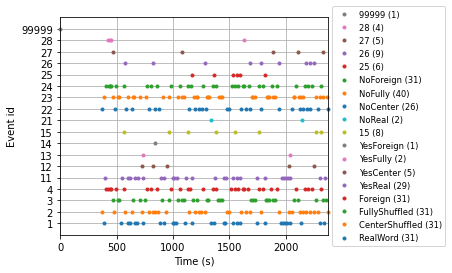

In [64]:
# plotting the events 
mne.viz.plot_events(events, sfreq=250, first_samp=raw.first_samp, event_id=event_id);

In [68]:
# setting time window 
tmin, tmax = -0.1, 0.7

# choosing only EEG channels for epoching (thus EOG false) 
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

#reject criterion of 150 microvolts
reject = dict(eeg=300e-6)

# epochs 
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, picks=picks,
                    baseline=(None, 0), reject=reject, preload=True)

Not setting metadata
293 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 293 events and 801 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['T8']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Oz', 'O2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['T7']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F7', 'F3', 'F4']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2', 'F7', 'Fz', 'F8', 'FC5', '